In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv(r"C:\Users\HP\Documents\dataset\unemployment in india.csv",encoding='latin-1')

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:

# change column name for understanding

data.columns=["states","date","frequency","EUR","EE","ELPR","Region","longitude","latitude"]

In [6]:
data.head()

,states,date,frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
data.describe()

,EUR,EE,ELPR,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
# check dataset contain missing value or not

print(data.isnull().sum())

states       0
date         0
frequency    0
EUR          0
EE           0
ELPR         0
Region       0
longitude    0
latitude     0
dtype: int64


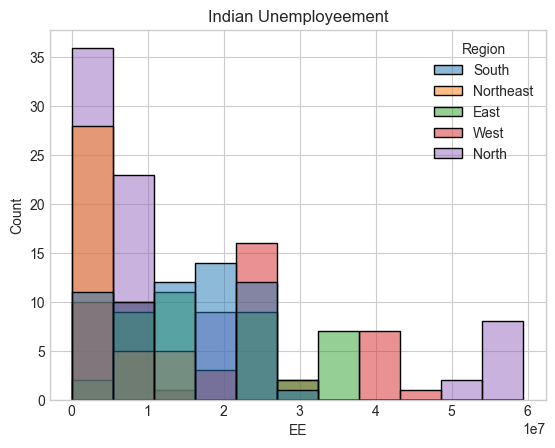

In [11]:
# visualize the data to analyze the unemployeement rate,estimated number of employed

plt.title("Indian Unemployeement")
sns.histplot(x="EE",hue="Region",data=data)
plt.show()

In [13]:
# create a dashboard to analyze the unemployeement rate of each indian state by region
unemploment=data[["states","Region","EUR"]]
figure=px.sunburst( unemploment,path=["Region","states"],
                  values="EUR",
                  width=700,height=700,color_continuous_scale="RDY1Gn",
                  title="Unemploymeent Rate in India")

In [1]:
figure.show()

NameError: name 'figure' is not defined

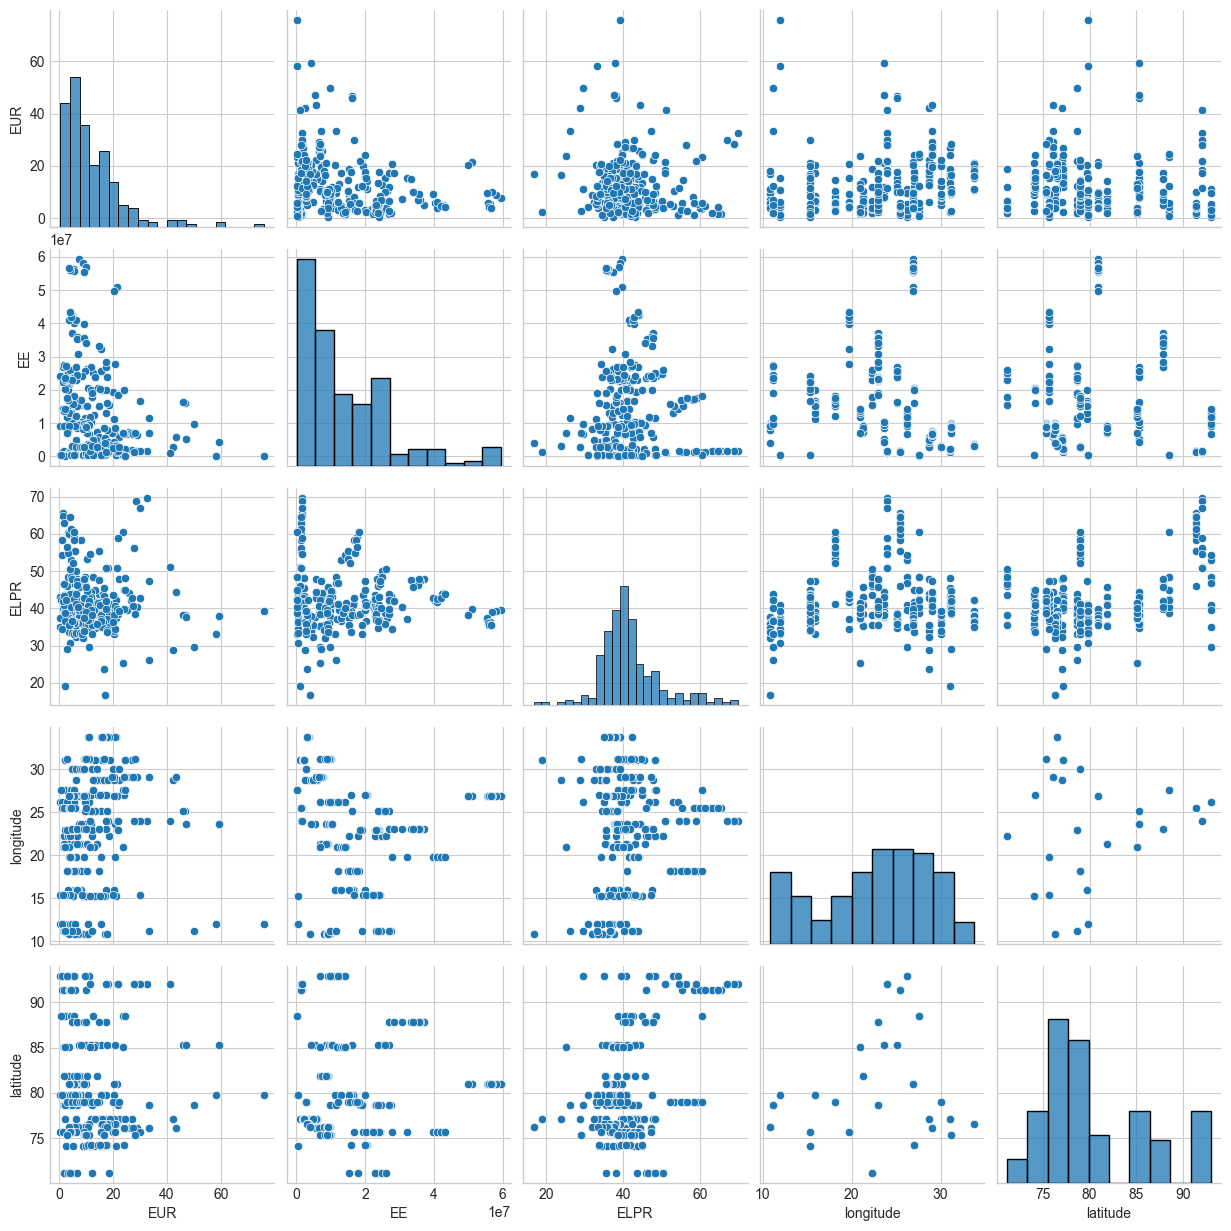

In [15]:
sns.pairplot(data)

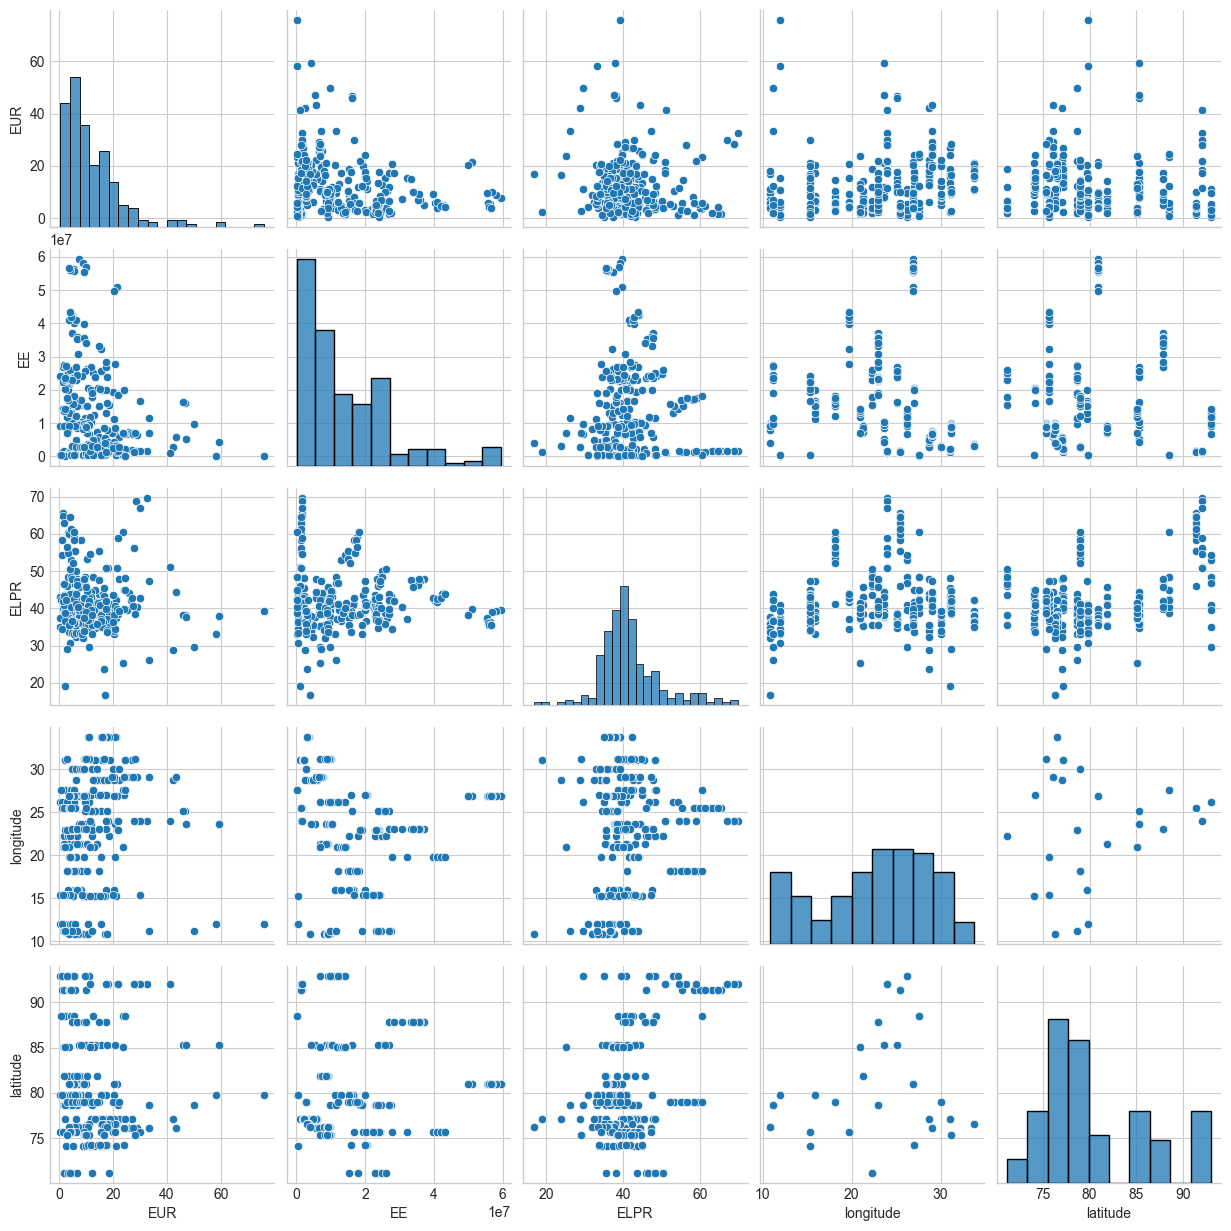

In [16]:
sns.pairplot(data)

In [17]:
x=data[['EUR','EE','ELPR','longitude','latitude']]

y=data['EE']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [20]:
x_train

,EUR,EE,ELPR,longitude,latitude
61,6.38,24757795,50.11,22.2587,71.1924
79,27.31,6698551,40.60,29.0588,76.0856
55,9.96,489111,42.21,15.2993,74.1240
166,1.42,14154039,39.96,20.9517,85.0985
67,1.87,22817232,43.55,22.2587,71.1924
...,...,...,...,...,...
238,8.98,58060531,39.23,26.8467,80.9462
169,0.58,457950,37.46,11.9416,79.8083
137,3.91,23341952,39.20,22.9734,78.6569
35,14.23,7332807,38.48,21.2787,81.8661


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()

In [23]:
# fit the model inside it
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
# evaluating model
coeff_data=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [25]:
# this table is saying
# if one unit is increasenthen area income will increase by $21
coeff_data

,Coefficient
EUR,-2.857100e-10
EE,1.000000e+00
ELPR,4.365615e-11
longitude,7.119024e-11
latitude,-1.288791e-10


In [27]:
# predict the model 
prediction=lm.predict(x_test)

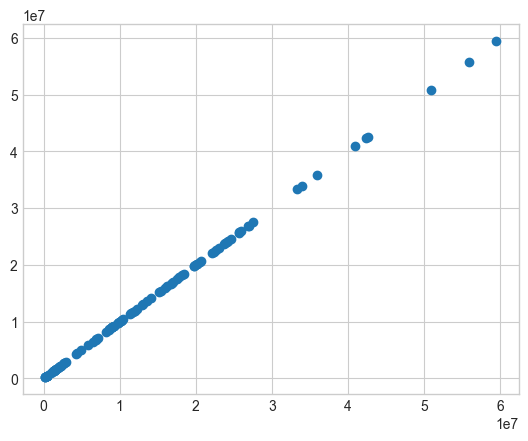

In [28]:
# plotting theprediction agains the target variable
plt.scatter(y_test,prediction)

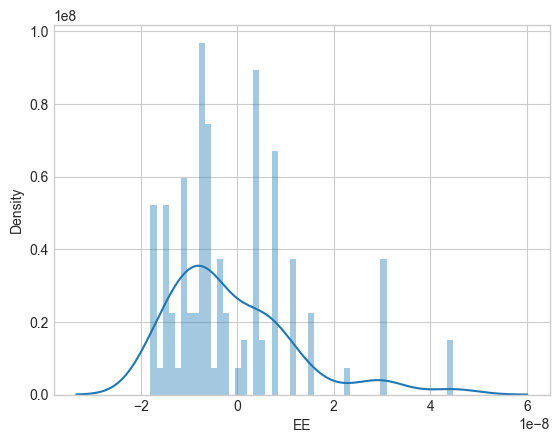

In [29]:
sns.distplot((y_test-prediction),bins=50);